# Exercise 2: Decision Trees

### Make sure that you read and fully understand all the guidelines listed below before you proceed with the exercise.

* HW assignments are a significant part of the learning experience in this course and contribute 50% to your final grade. So, make sure to devote the appropriate time to them.
* **Sharing solutions with someone who is not your submitting partner is strictly prohibited**. This includes reading someone else's code or sharing your code / posting it somewhere.
* Appeals regarding submissions that do not follow the guidelines will not be accepted. 


### Guidelines for Programming Exercises:

* Complete the required functions in `hw2.py`. Any modifications to this notebook will not be tested by our automated tests.
* Write **efficient**, **vectorized** code whenever possible. Some calculations in this exercise can take several minutes when implemented efficiently, but will take much longer otherwise. Unnecessary loops will result in point deductions.
* You are responsible for the correctness of your code. You can add tests to this jupyter notebook to validate your solution. The contents of this jupyter notebook will not be graded or checked.
* You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/), numpy and pandas only. **Do not import anything else.**
* Use `numpy` version 1.15.4 or higher.
* Your code must run without errors. Code that cannot run will not be graded.
* Your code will be tested using automated scripts. So, failure to follow the instructions may lead to test failure, which might significantly affect your grade. 


### Guidlines for Theoretical Exercises
* Your solution should be written or typed and submitted in a separate file `hw2.pdf`.
* If you scan a handwritten solution, make sure that your handwriting is legible and the scan quality is good.
* You are expected to solve the questions analytically and provide a step-by-step solution. 
* It is okay and often recommended to use python to carry out the computations. 
* You may use the lecture slides and previous homework assignments as references, unless explicitly asked to prove a result from class. 

### Submission Guidelines:
* Submit your solutiuon in a zip file that contains: 
  - The `hw2.py` script with your solution to the progamming exercise
  - This notebook with your added tests (this is not checked or graded)
  - The `hw2.pdf` file with your solution to the theoretical exercises.
  
* The name of the zip file should contain your ID(s). For example, `hw2_123456789_987654321.zip` if you submitted in pairs and `hw2_123456789.zip` if you submitted the exercise alone.
* Please use **only a zip** file in your submission.

---
---

## Please sign that you have read and understood the instructions: 

### *** 209276478,209660745 ***

---
---

# Part 1: Theoretical Exercises (16 points)


## 1. Gini Impurity
In class, we defined the Gini impurity as 
$$
\varphi_{Gini}(p) = 1 - \sum_{j=1}^k p_j^2,\qquad p \in [0,1]^k~,
$$
where $p=(p_1,\ldots,p_k)$ represents class proportions in a set of instances. This means that $\sum_{j=1}^kp_j = 1$. 

1. Prove that 
$$
\varphi_{Gini}(p) \leq 1-1/k.
$$
Hint: 
- Express the function $f : \mathbb R^{k-1} \to \mathbb R$:
$$
f(p_1,\ldots,p_{k-1}) = \varphi_{Gini}(p_1,\ldots,1 - \sum_{j=1}^k). 
$$
- Argue that $f$ is bounded from above, hence it has a maximal value in $\mathbb R^{k-1}$. 
- Solve the equation $\nabla f = 0$ and argue that the solution is unique. 

(you do not have to follow the hint; all correct and clearly written solutions are acceptable)


Let $Y_1$ and $Y_2$ be two independent random variables, each represnting the class label of a randomly sampled instance from the set. Namely:
$$
 \Pr[Y_i = j]=p_j, \qquad i\in\{1,2\}, \qquad j\in\{1\ldots k\}~.
$$ 
2. Prove that Gini impurity is the probability that two randomly sampled instances (with replacement) from the set of instances have different class labels. Namley, that
$$
\varphi_{Gini}(p) = \Pr[Y_1 \neq  Y_2].
$$



## 2. Information Gain
In class we claimed that **information gain is always non-negative**. Here, we will prove this for the specific case of binary classification, where we have only two class labels.

Recall that information gain is defined as follows:
$$
IG(S,A) ~~=~~ H(S) - \sum_{v\in Values(A)} \frac{|S_v|}{|S|}H(S_v)~,
$$
where $S$ is a set of data instances, $A$ is an attribute (ferature) with a finite set of possible values $Values(A)$, and $H$ is the entropy function applied to the probability vector associated with the class frequencies. Assuming that there are only two class lables, the entropy can be expressed as follows:
$$
H(S)  ~~=~~ h(p_1) ~~=~~ -p_1\log(p_1)-(1-p_1)\log(1-p_1)~,
$$
where $p_1$ is the frequency of the first label (and $1-p_1$ is the frequency of the second label). Here, we adhere to the convention that $0\cdot \log(0) = 0$ (as $\log(0)$ is undefined). 

We start by examining the function $h()$, which is also called the *binary entropy function* (see plot below). One feature of this function is that it is *concave*. Concave functions satisfy the following property: for every $x_1,x_2\in[0,1]$ and for every $\lambda_1,\lambda_2\in[0,1]$ such that $\lambda_1+\lambda_2=1$, we have:
$$
\begin{align}
h(\lambda_1 x_1 +  \lambda_2 x_2) \geq \lambda_1 h(x_1) + \lambda_2 h(x_2). 
\end{align}
$$

The plot below illustrates this inequality, whose correctness we will assume here without a formal proof (this can be proved by analysis of the first and second derivatives of $h()$).
![Entropy-concave](entropy-concave.png)

1. Use the inequality in (1) to prove (by induction) a more general claim: for any $t\geq 2$ points $x_1\ldots x_t\in [0,1]$, and $t$ weights $\lambda_1\ldots \lambda_t\in [0,1]$ such that $\sum_{j=1}^t\lambda_j = 1$, we have
$$
h\left(\sum_{j=1}^t\lambda_jx_j\right) \geq \sum_{j=1}^t\lambda_jh(x_j)~.
$$
This inequality, which applies to all concave functions, is also called *Jensen's inequality*.

2. Use the inequality you proved above to prove that information gain is always non-negative (when there are only two classes).

# Part 2: Coding Assignment (84 points)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2

## 1. Warmup - OOP in python

Our desicion tree will be implemented using a dedicated python class. Python classes are very similar to classes in other object oriented programming languages you might be familiar with. You can use the following [site](https://jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/) to learn about classes in python.

In [2]:
class Node(object):
    def __init__(self, data):
        self.data = data
        self.children = []

    def add_child(self, node):
        self.children.append(node)

In [3]:
n = Node(5)
p = Node(6)
q = Node(7)
n.add_child(p)
n.add_child(q)
n.children

[<__main__.Node at 0x107e23520>, <__main__.Node at 0x107e21e10>]

## 2. Data Exploration and Preprocessing

### Data Exploration
For the following exercise, we will use a dataset containing information on mushrooms. This dataset includes descriptions of hypothetical samples from 23 species of gilled mushrooms in the Agaricus and Lepiota genera. Each sample is identified as being "definitely edible", "definitely poisonous", or of "unknown edibility". Here, we will be conservative and will group the species of "unknown edibility" with the poisonous ones. Thus, we will have two classes: **edible** and **poisonous**. 
    
Each sample is also provided with information on the following 21 attributes (features):
1. cap-shape: bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s
1. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
1. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
1. bruises: bruises=t,no=f
1. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
1. gill-attachment: attached=a,descending=d,free=f,notched=n
1. gill-spacing: close=c,crowded=w,distant=d
1. gill-size: broad=b,narrow=n
1. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
1. stalk-shape: enlarging=e,tapering=t
1. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
1. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
1. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
1. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
1. veil-type: partial=p,universal=u
1. veil-color: brown=n,orange=o,white=w,yellow=y
1. ring-number: none=n,one=o,two=t
1. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
1. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
1. population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
1. habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

The table in `agaricus-lepiota.csv` contains feature and class information on 8124 mushroom samples. We start by reading the data using the `.read_csv` method from ``pandas``, and then visually the top and bottom of the table.

In [4]:
# load dataset
data = pd.read_csv('agaricus-lepiota.csv')
data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


One of the advantages of the Decision Tree algorithm is that almost no preprocessing is required. However, finding missing values is always important. Use the following command to confirm that there are no missing values in the data table.

In [5]:
data = data.dropna(axis=1)
print(data)


     cap-shape cap-surface cap-color bruises odor gill-attachment  \
0            x           s         n       t    p               f   
1            x           s         y       t    a               f   
2            b           s         w       t    l               f   
3            x           y         w       t    p               f   
4            x           s         g       f    n               f   
...        ...         ...       ...     ...  ...             ...   
8119         k           s         n       f    n               a   
8120         x           s         n       f    n               a   
8121         f           s         n       f    n               a   
8122         k           y         n       f    y               f   
8123         x           s         n       f    n               a   

     gill-spacing gill-size gill-color stalk-shape  ...  \
0               c         n          k           e  ...   
1               c         b          k           e  .

In [6]:
%conda install -y scikit-learn

Retrieving notices: done
Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


### Train/Test Split

As in all machine learning tasks, we split the dataset to `training` (75%) and `validation` (25%) sets.

In [7]:
from sklearn.model_selection import train_test_split
# Making sure the last column will hold the labels
X, y = data.drop('class', axis=1), data['class']
X = np.column_stack([X,y])
# split dataset using random_state to get the same split each time
X_train, X_validation = train_test_split(X, random_state=99)

print("Training dataset shape: ", X_train.shape)
print("Validation dataset shape: ", X_validation.shape)

Training dataset shape:  (6093, 22)
Validation dataset shape:  (2031, 22)


## 2. Impurity Measures (10 points)

Impurity measures play a central role in the tree construction algorithm, as they measure how far a set of samples is from being fully classified. We discussed two impurity measures in class: *Gini* and *Entropy*. Implement the functions `calc_gini` and `calc_entropy` in `hw2.py`. You are encouraged to test your implementation according to the expected behavior of those measures as seen in class.

In [8]:
from hw2 import calc_gini, calc_entropy

Perfect Split Test:
Entropy: -0.0
Gini: 0.0

Equal Split Test:
Entropy: 0.6931471805599453
Gini: 0.5

Uneven Split Test:
Entropy: 0.5623351446188083
Gini: 0.375

Three Equal Classes Test:
Entropy: 1.0986122886681096
Gini: 0.6666666666666667



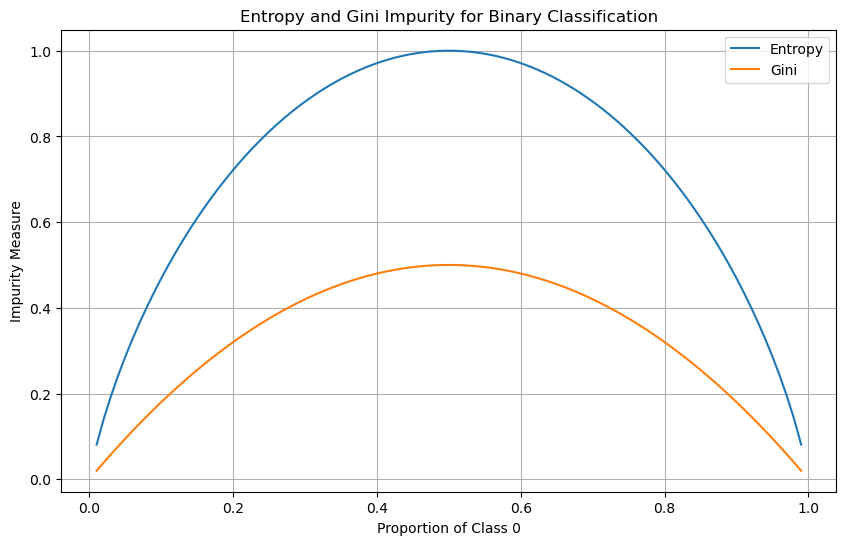

Real Dataset Test:
Entropy of X: 0.6927107493034801
Gini of X: 0.4995636322379775
Entropy of X_train: 0.692524486491283
Gini of X_train: 0.4993774351913738



In [9]:
perfect_split = np.array([[1, 2, 3, 0],
                           [4, 5, 6, 0],
                           [7, 8, 9, 0]])
print("Perfect Split Test:")
print(f"Entropy: {calc_entropy(perfect_split)}")
print(f"Gini: {calc_gini(perfect_split)}")
print()

##### Test Case 2: Equal Split (50/50) #####
# should give entropy = 1.0 and gini = 0.5 
equal_split = np.array([[1, 2, 3, 0],
                         [4, 5, 6, 0],
                         [7, 8, 9, 1],
                         [10, 11, 12, 1]])
print("Equal Split Test:")
print(f"Entropy: {calc_entropy(equal_split)}")
print(f"Gini: {calc_gini(equal_split)}")
print()

##### Test Case 3: Uneven Split (75/25) #####
# should give entropy ≈ 0.811 and gini = 0.375
uneven_split = np.array([[1, 2, 3, 0],
                          [4, 5, 6, 0],
                          [7, 8, 9, 0],
                          [10, 11, 12, 1]])
print("Uneven Split Test:")
print(f"Entropy: {calc_entropy(uneven_split)}")
print(f"Gini: {calc_gini(uneven_split)}")
print()

##### Test Case 4: Three Classes (33.3% each) #####
# should give entropy ≈ 1.585 and gini ≈ 0.667
three_classes = np.array([[1, 2, 3, 0],
                           [4, 5, 6, 1],
                           [7, 8, 9, 2]])
print("Three Equal Classes Test:")
print(f"Entropy: {calc_entropy(three_classes)}")
print(f"Gini: {calc_gini(three_classes)}")
print()

##### Visual Verification #####
#helps you visualize the relationship between proportions and metrics
import matplotlib.pyplot as plt

p_values = np.linspace(0.01, 0.99, 100)
entropy_values = []
gini_values = []

for p in p_values:
    # For binary classification: proportions are p and (1-p)
    prop_dict = {0: p, 1: 1-p}
    # Calculate entropy manually for verification
    entropy = -p * np.log2(p) - (1-p) * np.log2(1-p) 
    # Calculate gini manually for verification
    gini = 1 - (p**2 + (1-p)**2)
    
    entropy_values.append(entropy)
    gini_values.append(gini)

plt.figure(figsize=(10, 6))
plt.plot(p_values, entropy_values, label='Entropy')
plt.plot(p_values, gini_values, label='Gini')
plt.xlabel('Proportion of Class 0')
plt.ylabel('Impurity Measure')
plt.title('Entropy and Gini Impurity for Binary Classification')
plt.legend()
plt.grid(True)
plt.show()

##### actual data #####
print("Real Dataset Test:")
print(f"Entropy of X: {calc_entropy(X)}")
print(f"Gini of X: {calc_gini(X)}")
print(f"Entropy of X_train: {calc_entropy(X_train)}")
print(f"Gini of X_train: {calc_gini(X_train)}")
print()


## 3. Implementing A Class for Nodes in the Decision Tree (35 points)

Complete the implementation of the Python class `DecisionNode` in `hw2.py`. Follow these guidelines:
1. Implement the member functions based on their description below and their signatures as specified in `hw2.py`.
1. Implementation details are up to you, but maintain the function signatures and interface. 
1. **Do not change exisiting variables and function implentations**. 
1. You are allowed to add methods and variables and implement additional auxiliary functions.

Furthermore, you may assume that all features are discrete and enumerable. Thus, the set of possible values for each feature can be obtained by computing the unique values of that feature in the data.

A `DecisionNode` object has the following attributes (already defined in `hw2.py`):
* `data` holds the data instances associated with the node (ndarray).
* `terminal` True iff the node is a leaf (boolean).
* `feature` holds the column index of feature/attribute to split upon (int).
* `pred` holds the class prediction associated with the node (string).
* `depth` holds the depth of the node (int).
* `children` holds the children of the node (list of DecisionNode objects).
* `children_values` holds the value associated with each child for the feature used for splitting the node (list).
* `max_depth` holds the maximum allowed depth of the entire tree (int).
* `chi` holds the P-value cutoff used for $\chi^2$ pruning (double) (see below).
* `impurity_func` holds the impurity function to use for measuring goodness of a split (func).
* `gain_ratio` True iff GainRatio is used to score features (boolean).
* `feature_importance` holds the feature importance of the chosen feature.

### Basic Methods (10 points)

Implement the methods `calc_node_pred` and `add_child` of the `DecisionNode` class in `hw2.py`.

**did**

### Goodness of Split (10 Points)

Implement the method `goodness_of_split` of the `DecisionNode` class in `hw2.py`.

Goodnees of split allows us to prioritize different attributes when splitting the decision node. If the `gain_ratio` flag is set to `False` (its default value), then goodness of the split of a node associated with data $S$ with attribute $A$ is measured by impurity reduction defiend as follows:
$$
GOS(S,A) ~~=~~ \Delta\varphi(S, A) ~~=~~ \varphi(S) - \sum_{v\in Values(A)} \frac{|S_v|}{|S|}\varphi(S_v)~,
$$
where $\varphi$ is an impurity function (Gini or Entropy) based on the `impurity_func` attribute of the `DecisionNode` object.

If the `gain_ratio` flag is set to `True`, then goodness of a split is measured using gain ratio as follows:
$$
GOS(S,A) ~~=~~ GainRatio(S,A) ~~=~~ \frac{IG(S,A)}{SplitInfo(S,A)}~~,
$$
where $IG(S,A)$ (the information gain) is the impurity reduction computed using entropy, and $SplitInfo(S,A)$ is defined as follows:
$$
SplitInfo(S,A)=- \sum_{v\in Values(A)} \frac{|S_v|}{|S|}\log\left(\frac{|S_v|}{|S|}\right) ~.
$$


### Feature Importance (5 points) 

Implement the method `calc_feature_importance` of the `DecisionNode` class in `hw2.py`.

Feature importance of a given node is calculated as its goodness of split multiplied by the node's relative weight. The node's relative weight is defined as the ratio between the number of  training samples associated with the node ($S$) and the size of the training set $|S_{train}|$. Thus, the feature importance of a node associated with data samples $S$ and attribute $A$ is defined as:
$$
FI(S,A) = \frac{|S|}{|S_{train}|}GOS(S, A)
$$



### Split Node (10 points)

Implement the method `split` of the `DecisionNode` class in `hw2.py`.

This method finds the feature with highest "goodness of split" and uses it to split the node. Do not implement node pruning at this stage (see below).

In [10]:
from hw2 import DecisionNode

In [11]:
def test_decision_node_split():
    print("===== Testing DecisionNode Split Implementation =====")
    
    # Test 1: Basic Split Functionality
    print("\n===== Test 1: Basic Split Functionality =====")
    toy_data = np.array([
        [0, 0, 0],  # Feature 0, Feature 1, Label
        [0, 1, 0],
        [1, 0, 1],
        [1, 1, 1]
    ])
    test_node = DecisionNode(data=toy_data, impurity_func=calc_gini)
    print(f"Initial prediction: {test_node.pred}")
    print(f"Is terminal before split: {test_node.terminal}")
    print(f"Initial feature selected: {test_node.feature}")
    
    test_node.split()
    
    print(f"After split - Selected feature: {test_node.feature}")
    print(f"After split - Is terminal: {test_node.terminal}")
    print(f"After split - Number of children: {len(test_node.children)}")
    print(f"After split - Children values: {test_node.children_values}")
    
    # Verify children predictions
    if len(test_node.children) >= 2:
        print(f"Child for feature value {test_node.children_values[0]} - Prediction: {test_node.children[0].pred}")
        print(f"Child for feature value {test_node.children_values[0]} - Is terminal: {test_node.children[0].terminal}")
        print(f"Child for feature value {test_node.children_values[1]} - Prediction: {test_node.children[1].pred}")
        print(f"Child for feature value {test_node.children_values[1]} - Is terminal: {test_node.children[1].terminal}")
    
    # Test 2: Pure Node Behavior (should not split)
    print("\n===== Test 2: Pure Node Behavior =====")
    pure_data = np.array([
        [0, 0, 1],
        [1, 0, 1],
        [0, 1, 1],
        [1, 1, 1]
    ])
    pure_node = DecisionNode(data=pure_data, impurity_func=calc_gini)
    print(f"Pure node prediction: {pure_node.pred}")
    print(f"Is terminal before split: {pure_node.terminal}")
    
    pure_node.split()
    
    print(f"After split - Is terminal: {pure_node.terminal}")
    print(f"After split - Selected feature: {pure_node.feature}")
    print(f"After split - Number of children: {len(pure_node.children)}")
    
    # Test 3: Max Depth Constraint
    print("\n===== Test 3: Max Depth Constraint =====")
    depth_node = DecisionNode(data=toy_data, impurity_func=calc_gini, max_depth=0)
    print(f"Node at max depth - Is terminal before split: {depth_node.terminal}")
    
    depth_node.split()
    
    print(f"After split - Is terminal: {depth_node.terminal}")
    print(f"After split - Selected feature: {depth_node.feature}")
    print(f"After split - Number of children: {len(depth_node.children)}")
    
    # Test 4: Feature Importance Calculation
    print("\n===== Test 4: Feature Importance Calculation =====")
    fi_node = DecisionNode(data=toy_data, impurity_func=calc_gini)
    fi_node.split()
    fi_node.calc_feature_importance(len(toy_data))
    
    print(f"Selected feature: {fi_node.feature}")
    print(f"Feature importance: {fi_node.feature_importance}")
    
    # Test 5: Different Impurity Functions
    print("\n===== Test 5: Different Impurity Functions =====")
    gini_node = DecisionNode(data=toy_data, impurity_func=calc_gini)
    entropy_node = DecisionNode(data=toy_data, impurity_func=calc_entropy)
    gain_ratio_node = DecisionNode(data=toy_data, impurity_func=calc_entropy, gain_ratio=True)
    
    gini_node.split()
    entropy_node.split()
    gain_ratio_node.split()
    
    print(f"Gini impurity - Selected feature: {gini_node.feature}")
    print(f"Entropy impurity - Selected feature: {entropy_node.feature}")
    print(f"Gain Ratio - Selected feature: {gain_ratio_node.feature}")
    
    # Test 6: Recursive Tree Building (manual)
    print("\n===== Test 6: Recursive Tree Building =====")
    root = DecisionNode(data=toy_data, impurity_func=calc_gini)
    root.split()
    
    for child in root.children:
        child.split()
    
    # Print tree structure
    print(f"Node at depth {root.depth}:")
    print(f"Selected feature: {root.feature}")
    print(f"Is terminal: {root.terminal}")
    print(f"Prediction: {root.pred}")
    print(f"Number of children: {len(root.children)}")
    
    for i, child in enumerate(root.children):
        print(f"Child {i} for feature value {root.children_values[i]}:")
        print(f"  Node at depth {child.depth}:")
        print(f"  Selected feature: {child.feature}")
        print(f"  Is terminal: {child.terminal}")
        print(f"  Prediction: {child.pred}")
        print(f"  Number of children: {len(child.children)}")
        
        for j, grandchild in enumerate(child.children):
            print(f"  Child {j} for feature value {child.children_values[j]}:")
            print(f"    Node at depth {grandchild.depth}:")
            print(f"    Selected feature: {grandchild.feature}")
            print(f"    Is terminal: {grandchild.terminal}")
            print(f"    Prediction: {grandchild.pred}")
            print(f"    Number of children: {len(grandchild.children)}")
    
    # Test 7: Feature Importance in Tree
    print("\n===== Test 7: Feature Importance in Tree =====")
    root.calc_feature_importance(len(toy_data))
    for child in root.children:
        child.calc_feature_importance(len(toy_data))
    
    print(f"Node at depth 0 - Feature: {root.feature}, Importance: {root.feature_importance}")
    for i, child in enumerate(root.children):
        if child.feature != -1:  # Only print non-terminal nodes with a selected feature
            print(f"Node at depth 1 - Feature: {child.feature}, Importance: {child.feature_importance}")

# Run the tests
test_decision_node_split()
 
# python support passing a function as arguments to another function.
gini_node = DecisionNode(X, calc_gini)
entropy_node = DecisionNode(X, calc_entropy)
goodness_gini, split_values_gini = gini_node.goodness_of_split(0)
goodness_entropy, split_values_entropy = entropy_node.goodness_of_split(0)
 
goodness_gini, goodness_entropy

===== Testing DecisionNode Split Implementation =====

===== Test 1: Basic Split Functionality =====
Initial prediction: 0
Is terminal before split: False
Initial feature selected: -1
After split - Selected feature: 0
After split - Is terminal: False
After split - Number of children: 2
After split - Children values: [np.int64(0), np.int64(1)]
Child for feature value 0 - Prediction: 0
Child for feature value 0 - Is terminal: False
Child for feature value 1 - Prediction: 1
Child for feature value 1 - Is terminal: False

===== Test 2: Pure Node Behavior =====
Pure node prediction: 1
Is terminal before split: False
After split - Is terminal: True
After split - Selected feature: -1
After split - Number of children: 0

===== Test 3: Max Depth Constraint =====
Node at max depth - Is terminal before split: False
After split - Is terminal: True
After split - Selected feature: -1
After split - Number of children: 0

===== Test 4: Feature Importance Calculation =====
Selected feature: 0
Feature i

(np.float64(0.0199596578344422), np.float64(0.02129853562438866))

## 4. Implement A Class for Decision Trees (20 points)

Complete the implementation of the Python class `DecisionTree` in `hw2.py`. Follow these guidelines:
1. Implement the member functions based on their description below and their signatures as specified in `hw2.py`.
1. Implementation details are up to you, but maintain the function signatures and interface. 
1. **Do not change exisiting variables and function implentations**. 
1. You are allowed to add methods and variables and implement additional auxiliary functions.

A `DecisionTree` object has the following attributes (already defined in `hw2.py`):
* `data` holds the training data used for tree construction (ndarray).
* `root` holds the root node of the decision tree (`DecisionNode`)
* `max_depth` holds the maximum allowed depth of the entire tree (int).
* `chi` holds the P-value cutoff used for $\chi^2$ pruning (double) (see below).
* `impurity_func` holds the impurity function to use for measuring goodness of a split (func).
* `gain_ratio` True iff GainRatio is used to score goodness of split (boolean).

### Tree Construction (10 points)

Implement the method `build_tree` of the `DecisionTree` class in `hw2.py`.

The tree should be built recursively from the root. Compute the feature importance of all nodes in the tree (either during construction or after it).

In [12]:
from hw2 import DecisionTree

my split method cannot reuse a feature at the moment. 
After splitting on other features, previously used features might become informative again in new contexts.
should we Allow feature reuse? : Modify your split() method to consider all features, not just unused ones.

The code below constructs three decision trees using the training data and three different measures for goodness of split: Gini, Entropy, and Gain Ratio:

In [13]:
def test_decision_tree_build():
    print("===== Testing DecisionTree Build Implementation =====")
    
    # Test 1: Basic Tree Building
    print("\n===== Test 1: Basic Tree Building =====")
    toy_data = np.array([
        [0, 0, 0],  # Feature 0, Feature 1, Label
        [0, 1, 0],
        [1, 0, 1],
        [1, 1, 1]
    ])
    
    tree = DecisionTree(data=toy_data, impurity_func=calc_gini)
    tree.build_tree()
    
    print(f"Root node feature: {tree.root.feature}")
    print(f"Root node is terminal: {tree.root.terminal}")
    print(f"Number of children: {len(tree.root.children)}")
    
    if len(tree.root.children) > 0:
        print(f"Child 0 feature: {tree.root.children[0].feature}")
        print(f"Child 0 is terminal: {tree.root.children[0].terminal}")
        
    # Test 2: Maximum Depth Constraint
    print("\n===== Test 2: Maximum Depth Constraint =====")
    
    # Create a larger dataset that would naturally build a deeper tree
    complex_data = np.array([
        [0, 0, 0, 0],  # More features to allow deeper trees
        [0, 0, 1, 0],
        [0, 1, 0, 0], 
        [0, 1, 1, 1],
        [1, 0, 0, 1],
        [1, 0, 1, 1],
        [1, 1, 0, 0],
        [1, 1, 1, 1]
    ])
    
    # Test with max_depth=1
    tree_depth1 = DecisionTree(data=complex_data, impurity_func=calc_gini, max_depth=1)
    tree_depth1.build_tree()
    
    # Helper function to find the maximum depth in the tree
    def find_max_depth(node):
        if node.terminal or len(node.children) == 0:
            return node.depth
        return max(find_max_depth(child) for child in node.children)
    
    max_depth = find_max_depth(tree_depth1.root)
    print(f"Set max_depth=1, actual max depth found: {max_depth}")
    
    # Test 3: Different Impurity Functions
    print("\n===== Test 3: Different Impurity Functions =====")
    
    # Build trees with different impurity functions
    tree_gini = DecisionTree(data=complex_data, impurity_func=calc_gini)
    tree_entropy = DecisionTree(data=complex_data, impurity_func=calc_entropy)
    tree_gain_ratio = DecisionTree(data=complex_data, impurity_func=calc_entropy, gain_ratio=True)
    
    tree_gini.build_tree()
    tree_entropy.build_tree()
    tree_gain_ratio.build_tree()
    
    print(f"Gini tree - root feature: {tree_gini.root.feature}")
    print(f"Entropy tree - root feature: {tree_entropy.root.feature}")
    print(f"Gain Ratio tree - root feature: {tree_gain_ratio.root.feature}")
    
    # Test 4: Feature Importance Calculation
    print("\n===== Test 4: Feature Importance Calculation =====")
    feature_importance_tree = DecisionTree(data=toy_data, impurity_func=calc_gini)
    feature_importance_tree.build_tree()
    
    print(f"Root feature importance: {feature_importance_tree.root.feature_importance}")
    
    if len(feature_importance_tree.root.children) > 0:
        children_importance = [child.feature_importance for child in feature_importance_tree.root.children]
        print(f"Children feature importance: {children_importance}")
    
    # Test 5: Pure Dataset
    print("\n===== Test 5: Pure Dataset =====")
    pure_data = np.array([
        [0, 0, 1],
        [1, 0, 1],
        [0, 1, 1],
        [1, 1, 1]
    ])
    
    pure_tree = DecisionTree(data=pure_data, impurity_func=calc_gini)
    pure_tree.build_tree()
    
    print(f"Root is terminal: {pure_tree.root.terminal}")
    print(f"Root prediction: {pure_tree.root.pred}")
    print(f"Number of children: {len(pure_tree.root.children)}")

# Run the tests
test_decision_tree_build()

tree_gini = DecisionTree(data=X_train, impurity_func=calc_gini) # gini and goodness of split
tree_gini.build_tree()
 
tree_entropy = DecisionTree(data=X_train, impurity_func=calc_entropy) # entropy and goodness of split
tree_entropy.build_tree()
 
tree_entropy_gain_ratio = DecisionTree(data=X_train, impurity_func=calc_entropy, gain_ratio=True) # entropy and gain ratio
tree_entropy_gain_ratio.build_tree()

===== Testing DecisionTree Build Implementation =====

===== Test 1: Basic Tree Building =====
Root node feature: 0
Root node is terminal: False
Number of children: 2
Child 0 feature: -1
Child 0 is terminal: True

===== Test 2: Maximum Depth Constraint =====
Set max_depth=1, actual max depth found: 1

===== Test 3: Different Impurity Functions =====
Gini tree - root feature: 0
Entropy tree - root feature: 0
Gain Ratio tree - root feature: 0

===== Test 4: Feature Importance Calculation =====
Root feature importance: 0.5
Children feature importance: [0, 0]

===== Test 5: Pure Dataset =====
Root is terminal: True
Root prediction: 1
Number of children: 0


### Class Prediction and Tree Evaluation (10 points) 

Implement the methods `predict` and `calc_accuracy` of the `DecisionTree` class in `hw2.py`.

The code below calculates and prints the prediction accuracy of the three trees we constructed on the training data and validation data.

In [14]:
# Test implementation of predict and calc_accuracy methods

print("===== Testing predict and calc_accuracy Methods =====\n")

# Test 1: Basic prediction with a toy dataset
print("Test 1: Basic Prediction with Toy Dataset")
toy_data = np.array([
    [0, 0, 0],  # Feature 0, Feature 1, Label
    [0, 1, 0],
    [1, 0, 1],
    [1, 1, 1]
])

# Create and train a simple tree
toy_tree = DecisionTree(data=toy_data, impurity_func=calc_gini)
toy_tree.build_tree()

# Test individual predictions
test_instances = [
    np.array([0, 0, 0]),  # Should predict 0
    np.array([1, 1, 1]),  # Should predict 1
    np.array([0, 1, 0]),  # Should predict 0
    np.array([1, 0, 1])   # Should predict 1
]

for i, instance in enumerate(test_instances):
    prediction = toy_tree.predict(instance)
    true_label = str(instance[-1])
    correct = prediction == true_label
    print(f"Instance {i+1}: Features={instance[:-1]}, Prediction={prediction}, True={true_label}, Correct={correct}")

# Test accuracy calculation
accuracy = toy_tree.calc_accuracy(toy_data)
print(f"Accuracy on toy dataset: {accuracy:.2f}%")
print(f"Expected accuracy: 100.00% (perfect classifier for this simple dataset)\n")

# Test 2: Prediction with unseen feature values
print("Test 2: Prediction with Unseen Feature Values")
# Create a new instance with an unseen feature value
unseen_instance = np.array([2, 0, 1])  # Feature 0=2 wasn't in training
try:
    prediction = toy_tree.predict(unseen_instance)
    print(f"Prediction for unseen value: {prediction}")
    print("Successfully handled unseen feature value")
except Exception as e:
    print(f"Error handling unseen feature value: {e}")
print()

# Test 3: Accuracy on training data for all three tree types
print("Test 3: Accuracy on Training Data for Different Tree Types")
# Using the trees you've already built
training_accuracy_gini = tree_gini.calc_accuracy(X_train)
training_accuracy_entropy = tree_entropy.calc_accuracy(X_train)
training_accuracy_gain_ratio = tree_entropy_gain_ratio.calc_accuracy(X_train)

print(f"Training accuracy (Gini): {training_accuracy_gini:.2f}%")
print(f"Training accuracy (Entropy): {training_accuracy_entropy:.2f}%")
print(f"Training accuracy (Gain Ratio): {training_accuracy_gain_ratio:.2f}%")
print()

# Test 4: Accuracy on validation data for all three tree types
print("Test 4: Accuracy on Validation Data for Different Tree Types")
validation_accuracy_gini = tree_gini.calc_accuracy(X_validation)
validation_accuracy_entropy = tree_entropy.calc_accuracy(X_validation)
validation_accuracy_gain_ratio = tree_entropy_gain_ratio.calc_accuracy(X_validation)

print(f"Validation accuracy (Gini): {validation_accuracy_gini:.2f}%")
print(f"Validation accuracy (Entropy): {validation_accuracy_entropy:.2f}%")
print(f"Validation accuracy (Gain Ratio): {validation_accuracy_gain_ratio:.2f}%")
print()

# Test 5: Compare training vs. validation accuracy (check for overfitting)
print("Test 5: Training vs. Validation Accuracy (Check for Overfitting)")
print(f"Gini - Training: {training_accuracy_gini:.2f}%, Validation: {validation_accuracy_gini:.2f}%")
print(f"Entropy - Training: {training_accuracy_entropy:.2f}%, Validation: {validation_accuracy_entropy:.2f}%")
print(f"Gain Ratio - Training: {training_accuracy_gain_ratio:.2f}%, Validation: {validation_accuracy_gain_ratio:.2f}%")
print()

# Tes

print('gini', tree_gini.calc_accuracy(X_train), tree_gini.calc_accuracy(X_validation))
print('entropy', tree_entropy.calc_accuracy(X_train), tree_entropy.calc_accuracy(X_validation))
print('entropy gain ratio', tree_entropy_gain_ratio.calc_accuracy(X_train), 
      tree_entropy_gain_ratio.calc_accuracy(X_validation))

===== Testing predict and calc_accuracy Methods =====

Test 1: Basic Prediction with Toy Dataset
Instance 1: Features=[0 0], Prediction=0, True=0, Correct=True
Instance 2: Features=[1 1], Prediction=1, True=1, Correct=True
Instance 3: Features=[0 1], Prediction=0, True=0, Correct=True
Instance 4: Features=[1 0], Prediction=1, True=1, Correct=True
Accuracy on toy dataset: 100.00%
Expected accuracy: 100.00% (perfect classifier for this simple dataset)

Test 2: Prediction with Unseen Feature Values
Prediction for unseen value: 0
Successfully handled unseen feature value

Test 3: Accuracy on Training Data for Different Tree Types
Training accuracy (Gini): 99.25%
Training accuracy (Entropy): 99.41%
Training accuracy (Gain Ratio): 99.64%

Test 4: Accuracy on Validation Data for Different Tree Types
Validation accuracy (Gini): 77.50%
Validation accuracy (Entropy): 77.25%
Validation accuracy (Gain Ratio): 78.53%

Test 5: Training vs. Validation Accuracy (Check for Overfitting)
Gini - Training:

## 5. Depth pruning (5 points)

Now, we wish to prune the decision tree to different depths and examine the influence on prediction accuracy on the training data and validation data. 

Implement the function `depth_pruning` in `hw2.py`.

This function should construct trees with `max_depth` in the range `[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]` and calculate the training and validation accuracy of these trees. When constructing each individual tree, use the best goodness of split method you found above, and do not let the tree depth exceed the specified value of `max_depth`. Note that you might need to modify methods in the `DecisionNode` and/or `DecisionTree` classes.

In order to debug your code, plot the training and validation accuracy as a function of the `max_depth` and verify that your results make sense. The model with highest validation accuracy is marked in red.



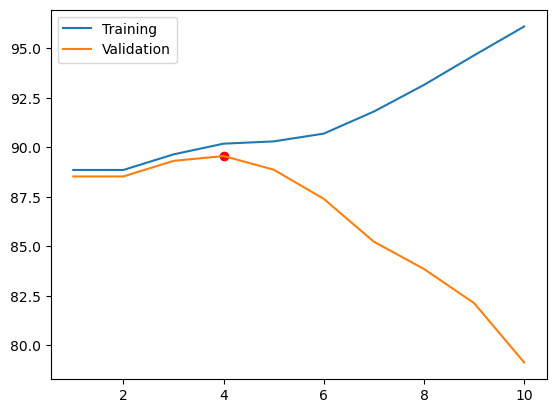

In [15]:
##### Your tests here #####
from hw2 import depth_pruning
depth_training_acc, depth_validation_acc = depth_pruning(X_train, X_validation)

plt.plot(range(1, 11), depth_training_acc, label='Training')
plt.plot(range(1, 11), depth_validation_acc, label='Validation')
plt.scatter(np.argmax(depth_validation_acc)+1, max(depth_validation_acc), c='r')
plt.legend();

The red dot marks the maximum validation accuracy, which occurs at depth 4
The tree with max_depth=4 is your best model
It achieves the highest validation accuracy (around 89.5%)

## 6. $\chi^2$ pruning (10 points)

Now, we wish to prune the decision tree using the $\chi^2$ (chi-squared) test.

Implement the function `chi_pruning` in `hw2.py`.

This function should construct trees while pruning nodes using P-value cut-off values in the range `[1, 0.5, 0.25, 0.1, 0.05, 0.0001]` (where 1 indicates no pruning). It then calculates and returns the training and validation accuracy of these trees. Note that you might need to modify methods in the `DecisionNode` and/or `DecisionTree` classes.

In order to debug your code, plot the training and validation accuracy as a function of the tuple (P-value, tree-depth) and verify that your results make sense. The model with highest validation accuracy is marked in red.



In [27]:
from hw2 import chi_pruning
from hw2 import find_max_depth

===== Test 1: Basic Chi-Square Pruning Functionality =====


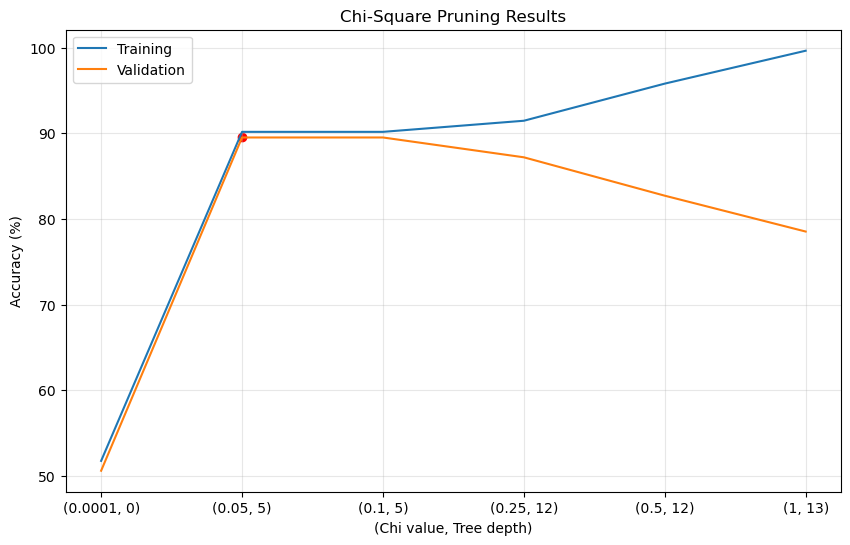


Chi-Square Pruning Results:
Chi=1.0000: Depth=0, Training=51.76%, Validation=50.62%
Chi=0.5000: Depth=5, Training=90.17%, Validation=89.51%
Chi=0.2500: Depth=5, Training=90.17%, Validation=89.51%
Chi=0.1000: Depth=12, Training=91.47%, Validation=87.20%
Chi=0.0500: Depth=12, Training=95.80%, Validation=82.72%
Chi=0.0001: Depth=13, Training=99.64%, Validation=78.53%

===== Test 2: Edge Case - Single Feature Dataset =====
Single feature dataset shape: (6093, 2)

Single Feature Chi-Square Pruning Results:
Chi=1.0000: Depth=0, Training=51.76%, Validation=50.62%
Chi=0.5000: Depth=1, Training=55.23%, Validation=55.49%
Chi=0.2500: Depth=1, Training=55.23%, Validation=55.49%
Chi=0.1000: Depth=1, Training=55.23%, Validation=55.49%
Chi=0.0500: Depth=1, Training=55.23%, Validation=55.49%
Chi=0.0001: Depth=1, Training=55.23%, Validation=55.49%

===== Test 3: Edge Case - Very Small Dataset =====
Small dataset shape: (100, 22)

Small Dataset Chi-Square Pruning Results:
Chi=1.0000: Depth=0, Training=

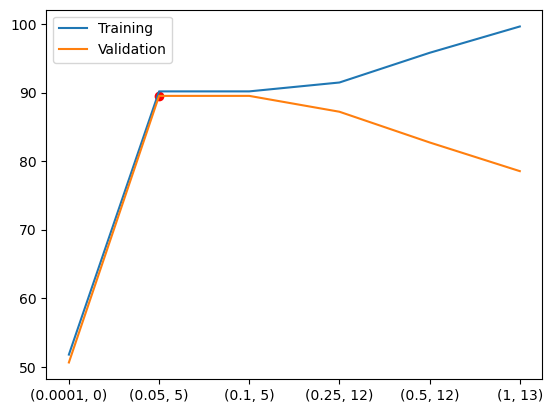

In [28]:
# Test 1: Basic chi-square pruning functionality
print("===== Test 1: Basic Chi-Square Pruning Functionality =====")
chi_training_acc, chi_validation_acc, depth = chi_pruning(X_train, X_validation)
chi_depth_tuple = [str((x, y)) for x, y in zip([1, 0.5, 0.25, 0.1, 0.05, 0.0001], depth)][::-1]
plt.figure(figsize=(10, 6))
plt.plot(chi_depth_tuple, chi_training_acc[::-1], label='Training')
plt.plot(chi_depth_tuple, chi_validation_acc[::-1], label='Validation')
plt.scatter(chi_depth_tuple[np.argmax(chi_validation_acc[::-1])], max(chi_validation_acc), c='r')
plt.xlabel('(Chi value, Tree depth)')
plt.ylabel('Accuracy (%)')
plt.title('Chi-Square Pruning Results')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print results in table format
print("\nChi-Square Pruning Results:")
for i, (chi, d, train_acc, val_acc) in enumerate(zip(
    [0.0001, 0.05, 0.1, 0.25, 0.5, 1][::-1], 
    depth[::-1], 
    chi_training_acc[::-1], 
    chi_validation_acc[::-1]
)):
    print(f"Chi={chi:.4f}: Depth={d}, Training={train_acc:.2f}%, Validation={val_acc:.2f}%")

# Test 2: Edge case - Single feature dataset
print("\n===== Test 2: Edge Case - Single Feature Dataset =====")
try:
    # Create a dataset with only one feature
    single_feature_train = X_train[:, [0, -1]]  # Keep only the first feature and class label
    single_feature_val = X_validation[:, [0, -1]]
    
    print(f"Single feature dataset shape: {single_feature_train.shape}")
    
    # Run chi-square pruning on this dataset
    sf_chi_training_acc, sf_chi_validation_acc, sf_depth = chi_pruning(single_feature_train, single_feature_val)
    
    print("\nSingle Feature Chi-Square Pruning Results:")
    for i, (chi, d, train_acc, val_acc) in enumerate(zip(
        [0.0001, 0.05, 0.1, 0.25, 0.5, 1][::-1], 
        sf_depth[::-1], 
        sf_chi_training_acc[::-1], 
        sf_chi_validation_acc[::-1]
    )):
        print(f"Chi={chi:.4f}: Depth={d}, Training={train_acc:.2f}%, Validation={val_acc:.2f}%")
except Exception as e:
    print(f"Error in single feature test: {e}")

# Test 3: Edge case - Very small dataset
print("\n===== Test 3: Edge Case - Very Small Dataset =====")
try:
    # Create a very small dataset
    small_train = X_train[:100]  # Just 100 samples
    small_val = X_validation[:50]  # Just 50 samples
    
    print(f"Small dataset shape: {small_train.shape}")
    
    # Run chi-square pruning on this dataset
    small_chi_training_acc, small_chi_validation_acc, small_depth = chi_pruning(small_train, small_val)
    
    print("\nSmall Dataset Chi-Square Pruning Results:")
    for i, (chi, d, train_acc, val_acc) in enumerate(zip(
        [0.0001, 0.05, 0.1, 0.25, 0.5, 1][::-1], 
        small_depth[::-1], 
        small_chi_training_acc[::-1], 
        small_chi_validation_acc[::-1]
    )):
        print(f"Chi={chi:.4f}: Depth={d}, Training={train_acc:.2f}%, Validation={val_acc:.2f}%")
except Exception as e:
    print(f"Error in small dataset test: {e}")

# Test 4: Edge case - Dataset with binary features
print("\n===== Test 4: Edge Case - Dataset with Binary Features =====")
try:
    # Create a dataset with binary features (0/1 values only)
    binary_train = X_train.copy()
    binary_val = X_validation.copy()
    
    # Convert all features to binary (0/1) by thresholding
    for i in range(binary_train.shape[1]-1):  # All columns except the last (class)
        unique_vals = np.unique(binary_train[:, i])
        if len(unique_vals) > 2:  # If more than 2 values
            median = np.median(binary_train[:, i])
            binary_train[:, i] = (binary_train[:, i] > median).astype(int)
            binary_val[:, i] = (binary_val[:, i] > median).astype(int)
    
    print(f"Binary features dataset shape: {binary_train.shape}")
    
    # Run chi-square pruning on this dataset
    bin_chi_training_acc, bin_chi_validation_acc, bin_depth = chi_pruning(binary_train, binary_val)
    
    print("\nBinary Features Chi-Square Pruning Results:")
    for i, (chi, d, train_acc, val_acc) in enumerate(zip(
        [0.0001, 0.05, 0.1, 0.25, 0.5, 1][::-1], 
        bin_depth[::-1], 
        bin_chi_training_acc[::-1], 
        bin_chi_validation_acc[::-1]
    )):
        print(f"Chi={chi:.4f}: Depth={d}, Training={train_acc:.2f}%, Validation={val_acc:.2f}%")
except Exception as e:
    print(f"Error in binary features test: {e}")

# Test 5: Consistency check between depth and chi pruning
print("\n===== Test 5: Consistency Check Between Pruning Methods =====")
# Get best chi value
best_chi_idx = np.argmax(chi_validation_acc)
best_chi = [0.0001, 0.05, 0.1, 0.25, 0.5, 1][best_chi_idx]
best_chi_depth = depth[best_chi_idx]

# Run depth pruning with the depth found from chi pruning
tree_depth = DecisionTree(
    data=X_train,
    impurity_func=calc_entropy,
    max_depth=best_chi_depth,
    gain_ratio=True
)
tree_depth.build_tree()
depth_train_acc = tree_depth.calc_accuracy(X_train)
depth_val_acc = tree_depth.calc_accuracy(X_validation)

# Run chi pruning with the best chi value
tree_chi = DecisionTree(
    data=X_train,
    impurity_func=calc_entropy,
    chi=best_chi,
    gain_ratio=True
)
tree_chi.build_tree()
chi_train_acc = tree_chi.calc_accuracy(X_train)
chi_val_acc = tree_chi.calc_accuracy(X_validation)

print(f"Best chi value = {best_chi} produced a tree of depth {best_chi_depth}")
print(f"Depth pruning at max_depth={best_chi_depth}: Training={depth_train_acc:.2f}%, Validation={depth_val_acc:.2f}%")
print(f"Chi pruning at chi={best_chi}: Training={chi_train_acc:.2f}%, Validation={chi_val_acc:.2f}%")
print(f"Difference in validation accuracy: {abs(chi_val_acc - depth_val_acc):.2f}%")

# Test 6: Verify calculate_chi_square on simple example
print("\n===== Test 6: Verify calculate_chi_square Function =====")
try:
    # Create a simple test case
    simple_data = np.array([
        [0, 0, 0],  # Feature 1, Feature 2, Class
        [0, 0, 0],
        [0, 1, 0],
        [0, 1, 1],
        [1, 0, 1],
        [1, 0, 1],
        [1, 1, 0],
        [1, 1, 1]
    ])
    
    # Create a test node
    test_node = DecisionNode(data=simple_data, impurity_func=calc_entropy)
    
    # Get groups by splitting on feature 0
    _, groups_0 = test_node.goodness_of_split(0)
    
    # Calculate chi-square
    chi_stat_0 = test_node.calculate_chi_square(0, groups_0)
    
    # Expected chi-square calculation:
    # Feature 0=0 has 4 samples, 3 class 0, 1 class 1
    # Feature 0=1 has 4 samples, 1 class 0, 3 class 1
    # Overall: 4 class 0, 4 class 1 (50% each)
    # Expected for Feature 0=0: 2 class 0, 2 class 1
    # Expected for Feature 0=1: 2 class 0, 2 class 1
    # Chi-square: ((3-2)²/2) + ((1-2)²/2) + ((1-2)²/2) + ((3-2)²/2) = 2.0
    
    print(f"Chi-square for feature 0: {chi_stat_0:.4f}")
    print(f"Expected value (approximate): 2.0000")
    
    # Get groups by splitting on feature 1
    _, groups_1 = test_node.goodness_of_split(1)
    
    # Calculate chi-square
    chi_stat_1 = test_node.calculate_chi_square(1, groups_1)
    
    print(f"Chi-square for feature 1: {chi_stat_1:.4f}")
    
    # Calculate degrees of freedom for each case
    df_0 = (len(groups_0) - 1) * (len(np.unique(simple_data[:, -1])) - 1)
    df_1 = (len(groups_1) - 1) * (len(np.unique(simple_data[:, -1])) - 1)
    
    print(f"Degrees of freedom for feature 0: {df_0}")
    print(f"Degrees of freedom for feature 1: {df_1}")
    
    # Get critical values for alpha=0.05
    crit_0 = chi_table[df_0][0.05]
    crit_1 = chi_table[df_1][0.05]
    
    print(f"Critical value at alpha=0.05 for feature 0: {crit_0}")
    print(f"Critical value at alpha=0.05 for feature 1: {crit_1}")
    
    # Check significance
    print(f"Feature 0 split is significant at alpha=0.05: {chi_stat_0 > crit_0}")
    print(f"Feature 1 split is significant at alpha=0.05: {chi_stat_1 > crit_1}")
    
except Exception as e:
    print(f"Error in chi-square verification: {e}")

# Final comparison: Build the two best trees
print("\n===== Final Comparison: Best Trees from Each Pruning Method =====")
# Get best depth from depth pruning (assuming you ran this earlier)
best_depth = 4  # From your graph showing depth=4 was optimal

# Tree with highest validation accuracy based on depth pruning
tree_max_depth = DecisionTree(
    data=X_train,
    impurity_func=calc_entropy,
    max_depth=best_depth,
    gain_ratio=True
)
tree_max_depth.build_tree()

# Tree with highest validation accuracy based on chi-squared pruning
tree_chi = DecisionTree(
    data=X_train,
    impurity_func=calc_entropy,
    chi=best_chi,
    gain_ratio=True
)
tree_chi.build_tree()

# Compare performance
depth_train_acc = tree_max_depth.calc_accuracy(X_train)
depth_val_acc = tree_max_depth.calc_accuracy(X_validation)
chi_train_acc = tree_chi.calc_accuracy(X_train)
chi_val_acc = tree_chi.calc_accuracy(X_validation)

actual_depth_max = find_max_depth(tree_max_depth.root)
actual_depth_chi = find_max_depth(tree_chi.root)

print(f"Depth-pruned tree (max_depth={best_depth}):")
print(f"  Actual depth: {actual_depth_max}")
print(f"  Training accuracy: {depth_train_acc:.2f}%")
print(f"  Validation accuracy: {depth_val_acc:.2f}%")

print(f"\nChi-square-pruned tree (chi={best_chi}):")
print(f"  Actual depth: {actual_depth_chi}")
print(f"  Training accuracy: {chi_train_acc:.2f}%")
print(f"  Validation accuracy: {chi_val_acc:.2f}%")

print(f"\nBetter validation accuracy: {'Depth pruning' if depth_val_acc > chi_val_acc else 'Chi-square pruning'}")

chi_training_acc, chi_validation_acc, depth = chi_pruning(X_train, X_validation)

chi_depth_tuple = [str((x, y)) for x, y in zip([1, 0.5, 0.25, 0.1, 0.05, 0.0001], depth)][::-1]
plt.plot(chi_depth_tuple, chi_training_acc[::-1], label='Training')
plt.plot(chi_depth_tuple, chi_validation_acc[::-1], label='Validation')
plt.scatter(chi_depth_tuple[np.argmax(chi_validation_acc[::-1])], max(chi_validation_acc), c='r')
plt.legend();

Now, modify the code below to construct the two best trees based on the two pruning approaches.

In [29]:
# Tree with highest validation accuracy based on depth pruning
tree_max_depth = DecisionTree(data=X_train, impurity_func=calc_entropy,max_depth=4,gain_ratio=True)
tree_max_depth.build_tree()
# Tree with highest validation accuracy based on chi-squared pruning
tree_chi = DecisionTree(data=X_train, impurity_func=calc_entropy, chi=0.05, gain_ratio=True)
tree_chi.build_tree()

## 7. Selecting Smallest Tree (4 points) 

Of the two trees above, we wish to choose the one with fewer nodes. Implement the function `count_nodes` in `hw2.py`. This function counts the number of nodes in a subtree rooted by a given `DecisionNode` object (including that node).

In [34]:
from hw2 import count_nodes

Uncomment the two lines of code below to print the sizes of the two trees you constructed above.

In [36]:
##### Testing count_nodes function for various edge cases #####

print("===== Testing count_nodes function =====")

# Test 1: Normal trees (which you've already done)
print("Test 1: Normal trees")
print(f"Depth-pruned tree node count: {count_nodes(tree_max_depth.root)}")
print(f"Chi-pruned tree node count: {count_nodes(tree_chi.root)}")

# Test 2: Edge case - Empty tree (null node)
print("\nTest 2: Empty tree")
try:
    null_count = count_nodes(None)
    print(f"Empty tree node count: {null_count}")
    assert null_count == 0, "Empty tree should have 0 nodes"
    print("✓ Empty tree test passed")
except Exception as e:
    print(f"✗ Empty tree test failed with error: {e}")

# Test 3: Edge case - Single node tree (just a root)
print("\nTest 3: Single node tree")
try:
    # Create a dummy node with no children
    class DummyNode:
        def __init__(self):
            self.children = []
    
    single_node = DummyNode()
    single_count = count_nodes(single_node)
    print(f"Single node tree count: {single_count}")
    assert single_count == 1, "Single node tree should have 1 node"
    print("✓ Single node tree test passed")
except Exception as e:
    print(f"✗ Single node tree test failed with error: {e}")

# Test 4: Edge case - Node with null children entries
print("\nTest 4: Node with null children")
try:
    # Create a dummy node with some null children
    class NodeWithNullChildren:
        def __init__(self):
            self.children = [None, DummyNode(), None, DummyNode()]
    
    null_children_node = NodeWithNullChildren()
    null_children_count = count_nodes(null_children_node)
    print(f"Node with null children count: {null_children_count}")
    assert null_children_count == 3, "Should count only non-null nodes (1 parent + 2 children)"
    print("✓ Node with null children test passed")
except Exception as e:
    print(f"✗ Node with null children test failed with error: {e}")

# Test 5: Edge case - Node without 'children' attribute
print("\nTest 5: Node without 'children' attribute")
try:
    # Create a node that doesn't have a children attribute
    class NodeWithoutChildren:
        def __init__(self):
            pass  # No children attribute
    
    no_children_attr = NodeWithoutChildren()
    no_attr_count = count_nodes(no_children_attr)
    print(f"Node without children attribute count: {no_attr_count}")
    assert no_attr_count == 1, "Should count a node even if it has no children attribute"
    print("✓ Node without children attribute test passed")
except Exception as e:
    print(f"✗ Node without children attribute test failed with error: {e}")

# Test 6: Deep tree with fixed structure
print("\nTest 6: Deep tree with fixed structure")
try:
    # Create a tree with known structure
    class TreeNode:
        def __init__(self):
            self.children = []
    
    # Build a tree with exactly 10 nodes in a line
    root = TreeNode()
    current = root
    
    # Add 9 children in a chain
    for i in range(9):
        new_node = TreeNode()
        current.children.append(new_node)
        current = new_node
    
    deep_count = count_nodes(root)
    print(f"Deep tree node count: {deep_count}")
    assert deep_count == 10, "Deep tree should have exactly 10 nodes"
    print("✓ Deep tree test passed")
except Exception as e:
    print(f"✗ Deep tree test failed with error: {e}")

# Test 7: Wide tree (many children at one level)
print("\nTest 7: Wide tree")
try:
    # Create a tree with a root and many children
    wide_root = TreeNode()
    
    # Add 50 children to the root
    for i in range(50):
        wide_root.children.append(TreeNode())
    
    wide_count = count_nodes(wide_root)
    print(f"Wide tree node count: {wide_count}")
    assert wide_count == 51, "Wide tree should have 51 nodes (1 root + 50 children)"
    print("✓ Wide tree test passed") 
except Exception as e:
    print(f"✗ Wide tree test failed with error: {e}")

# Test 8: Complex tree with multiple levels
print("\nTest 8: Complex tree with multiple levels")
try:
    # Create a complex tree with a known number of nodes
    complex_root = TreeNode()
    
    # Level 1: Add 3 children to root
    for i in range(3):
        child = TreeNode()
        complex_root.children.append(child)
        
        # Level 2: Add 2 children to each Level 1 node
        for j in range(2):
            grandchild = TreeNode()
            child.children.append(grandchild)
            
            # Level 3: Add 2 children to each Level 2 node
            for k in range(2):
                great_grandchild = TreeNode()
                grandchild.children.append(great_grandchild)
    
    # Total: 1 root + 3 children + 6 grandchildren + 12 great-grandchildren = 22 nodes
    complex_count = count_nodes(complex_root)
    print(f"Complex tree node count: {complex_count}")
    assert complex_count == 22, "Complex tree should have 22 nodes"
    print("✓ Complex tree test passed")
except Exception as e:
    print(f"✗ Complex tree test failed with error: {e}")

print("\n===== count_nodes testing completed =====")
print(count_nodes(tree_max_depth.root))
print(count_nodes(tree_chi.root))


===== Testing count_nodes function =====
Test 1: Normal trees
Depth-pruned tree node count: 380
Chi-pruned tree node count: 45

Test 2: Empty tree
Empty tree node count: 0
✓ Empty tree test passed

Test 3: Single node tree
Single node tree count: 1
✓ Single node tree test passed

Test 4: Node with null children
Node with null children count: 3
✓ Node with null children test passed

Test 5: Node without 'children' attribute
Node without children attribute count: 1
✓ Node without children attribute test passed

Test 6: Deep tree with fixed structure
Deep tree node count: 10
✓ Deep tree test passed

Test 7: Wide tree
Wide tree node count: 51
✓ Wide tree test passed

Test 8: Complex tree with multiple levels
Complex tree node count: 22
✓ Complex tree test passed

===== count_nodes testing completed =====
380
45


## 8. Print the tree

We provided you with a function that should print your tree for your own debugging purposes. 

This code prints:
```
[ROOT, feature=X0],
  [X0=a, feature=X2]
    [X2=c, leaf]: [{1.0: 10}]
    [X2=d, leaf]: [{0.0: 10}]
  [X0=y, feature=X5], 
       [X5=a, leaf]: [{1.0: 5}]
       [X5=s, leaf]: [{0.0: 10}]
  [X0=e, leaf]: [{0.0: 25, 1.0: 50}]
```

In [ ]:
def print_tree(node, depth=0, parent_feature='ROOT', feature_val='ROOT'):
    '''
    prints the tree according to the example above

    Input:
    - node: a node in the decision tree

    This function has no return value
    '''
    # If the node is not a leaf (terminal) node
    if node.terminal == False:
        # Special case for the root node
        if node.depth == 0:
            print('[ROOT, feature=X{}, importance={:.3f}]'.format(node.feature, node.feature_importance))
        else:
            # Print internal node with indentation based on depth
            print('{}[X{}={}, feature=X{}, importance={:.3f}], Depth: {}'.format(depth*'  ', parent_feature, 
                                                                             feature_val, node.feature, 
                                                                             node.feature_importance, node.depth))
        # Recursively print all children
        for i, child in enumerate(node.children):
            print_tree(child, depth+1, node.feature, node.children_values[i])
    else:
        # This is a leaf node - print the class distribution
        classes_count = {}
        labels, counts = np.unique(node.data[:, -1], return_counts=True)
        for l, c in zip(labels, counts):
            classes_count[l] = c
        print('{}[X{}={}, leaf]: [{}], Depth: {}'.format(depth*'  ', parent_feature, feature_val,
                                                         classes_count, node.depth))

In [22]:
print_tree(tree_entropy_gain_ratio.root)

[ROOT, feature=X4, importance=0.216]
  [X4=a, feature=X2, importance=0.000], Depth: 1
    [X2=n, feature=X8, importance=0.000], Depth: 2
      [X8=n, feature=X19, importance=0.001], Depth: 3
        [X19=s, feature=X0, importance=0.000], Depth: 4
          [X0=f, feature=X18, importance=0.000], Depth: 5
            [X18=k, leaf]: [{'e': np.int64(1)}], Depth: 6
            [X18=n, feature=X20, importance=0.000], Depth: 6
              [X20=g, leaf]: [{'e': np.int64(1)}], Depth: 7
              [X20=p, leaf]: [{'p': np.int64(1)}], Depth: 7
          [X0=x, leaf]: [{'e': np.int64(2), 'p': np.int64(2)}], Depth: 5
        [X19=y, leaf]: [{'e': np.int64(8)}], Depth: 4
      [X8=p, feature=X0, importance=0.000], Depth: 3
        [X0=f, feature=X19, importance=0.000], Depth: 4
          [X19=s, leaf]: [{'e': np.int64(2)}], Depth: 5
          [X19=y, leaf]: [{'p': np.int64(1)}], Depth: 5
        [X0=x, leaf]: [{'e': np.int64(7)}], Depth: 4
      [X8=w, feature=X18, importance=0.000], Depth: 3
 